<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/PCA_Study_Iris_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load the iris dataset
iris = load_iris()
# Create a DataFrame for easier exploration
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
print("First, let's look at our raw data:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")

First, let's look at our raw data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Check the basic statistics
print("Basic statistics of our features:")
print(df.describe())

# Look at correlations between features
correlation_matrix = df.iloc[:, :-1].corr()  # Exclude species column
print("\nCorrelation between features:")
print(correlation_matrix)

Basic statistics of our features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Correlation between features:
       

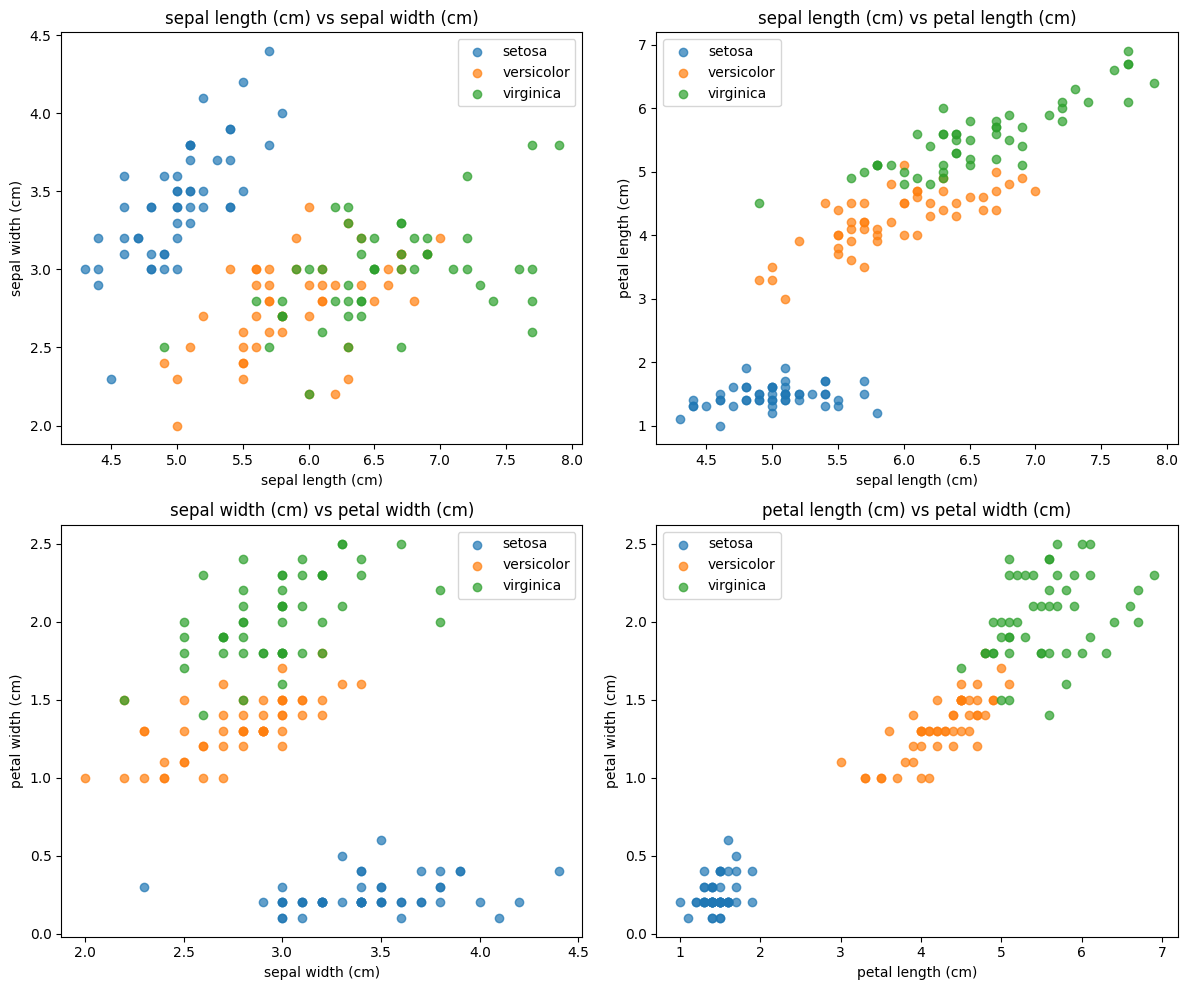

In [5]:
# Create scatter plots to see relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
feature_pairs = [(0, 1), (0, 2), (1, 3), (2, 3)]
feature_names = iris.feature_names

for idx, (i, j) in enumerate(feature_pairs):
    row, col = idx // 2, idx % 2
    for species_idx, species_name in enumerate(iris.target_names):
        species_data = df[df['species'] == species_idx]
        axes[row, col].scatter(species_data.iloc[:, i], species_data.iloc[:, j],
                              label=species_name, alpha=0.7)
    axes[row, col].set_xlabel(feature_names[i])
    axes[row, col].set_ylabel(feature_names[j])
    axes[row, col].legend()
    axes[row, col].set_title(f'{feature_names[i]} vs {feature_names[j]}')

plt.tight_layout()
plt.show()

In [6]:
# Separate features from target
X = df.iloc[:, :-1].values  # Features only
y = df['species'].values    # Species labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before standardization - feature ranges:")
for i, name in enumerate(iris.feature_names):
    print(f"{name}: {X[:, i].min():.2f} to {X[:, i].max():.2f}")

print("\nAfter standardization - feature ranges:")
for i, name in enumerate(iris.feature_names):
    print(f"{name}: {X_scaled[:, i].min():.2f} to {X_scaled[:, i].max():.2f}")

Before standardization - feature ranges:
sepal length (cm): 4.30 to 7.90
sepal width (cm): 2.00 to 4.40
petal length (cm): 1.00 to 6.90
petal width (cm): 0.10 to 2.50

After standardization - feature ranges:
sepal length (cm): -1.87 to 2.49
sepal width (cm): -2.43 to 3.09
petal length (cm): -1.57 to 1.79
petal width (cm): -1.45 to 1.71


Covariance matrix of standardized features:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


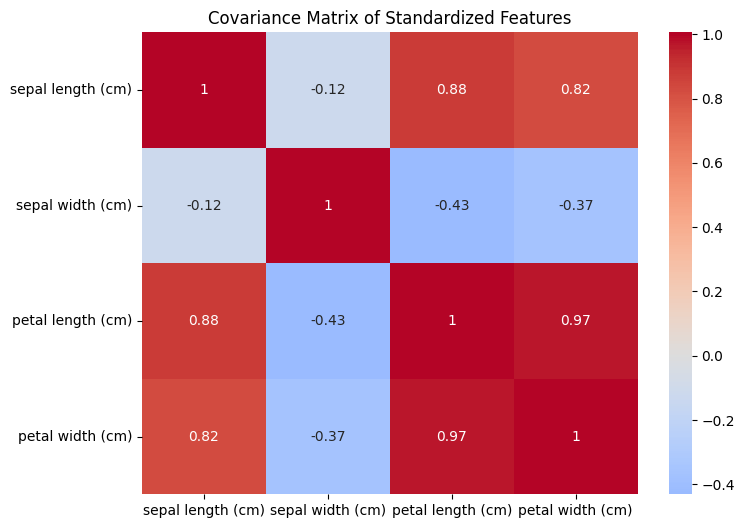

In [7]:
# Calculate covariance matrix of standardized data
cov_matrix = np.cov(X_scaled.T)
print("Covariance matrix of standardized features:")
print(cov_matrix)

# Visualize the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0,
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix of Standardized Features')
plt.show()

In [8]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues (variance captured by each component):")
for i, val in enumerate(eigenvalues):
    print(f"PC{i+1}: {val:.4f}")

print("\nEigenvectors (direction of each principal component):")
for i in range(len(eigenvalues)):
    print(f"PC{i+1}: {eigenvectors[:, i]}")

Eigenvalues (variance captured by each component):
PC1: 2.9381
PC2: 0.9202
PC3: 0.1477
PC4: 0.0209

Eigenvectors (direction of each principal component):
PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
PC3: [-0.71956635  0.24438178  0.14212637  0.63427274]
PC4: [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


In [9]:
# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance by each component:")
for i, (individual, cumulative) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"PC{i+1}: {individual:.4f} ({individual*100:.2f}%) - Cumulative: {cumulative:.4f} ({cumulative*100:.2f}%)")


Explained variance by each component:
PC1: 0.7296 (72.96%) - Cumulative: 0.7296 (72.96%)
PC2: 0.2285 (22.85%) - Cumulative: 0.9581 (95.81%)
PC3: 0.0367 (3.67%) - Cumulative: 0.9948 (99.48%)
PC4: 0.0052 (0.52%) - Cumulative: 1.0000 (100.00%)


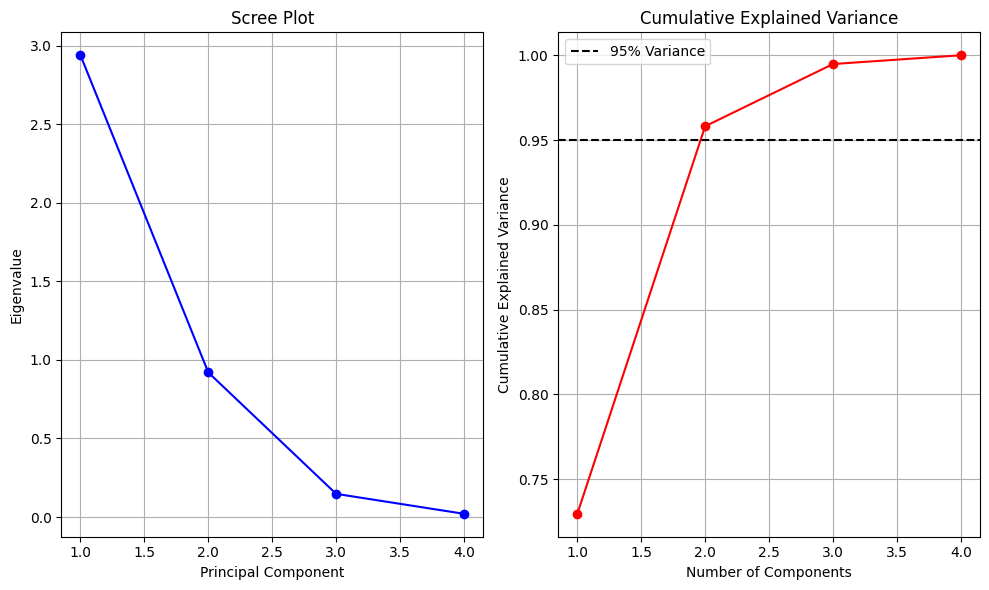

In [10]:
plt.figure(figsize=(10, 6))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)

# Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Apply PCA transformation
pca = PCA(n_components=2)  # Keep 2 components based on our analysis
X_pca = pca.fit_transform(X_scaled)

print(f"Original data shape: {X_scaled.shape}")
print(f"Transformed data shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.4f}")

Original data shape: (150, 4)
Transformed data shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]
Total variance retained: 0.9581


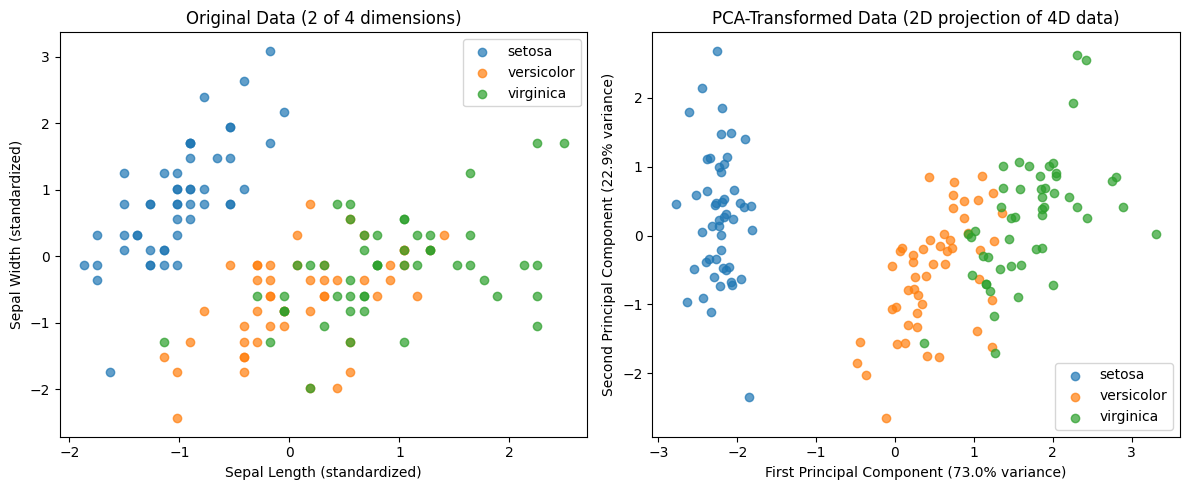

In [12]:
plt.figure(figsize=(12, 5))

# Plot original data (using first two features as example)
plt.subplot(1, 2, 1)
for species_idx, species_name in enumerate(iris.target_names):
    mask = y == species_idx
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], label=species_name, alpha=0.7)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Original Data (2 of 4 dimensions)')
plt.legend()

# Plot PCA-transformed data
plt.subplot(1, 2, 2)
for species_idx, species_name in enumerate(iris.target_names):
    mask = y == species_idx
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=species_name, alpha=0.7)
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA-Transformed Data (2D projection of 4D data)')
plt.legend()

plt.tight_layout()
plt.show()